In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


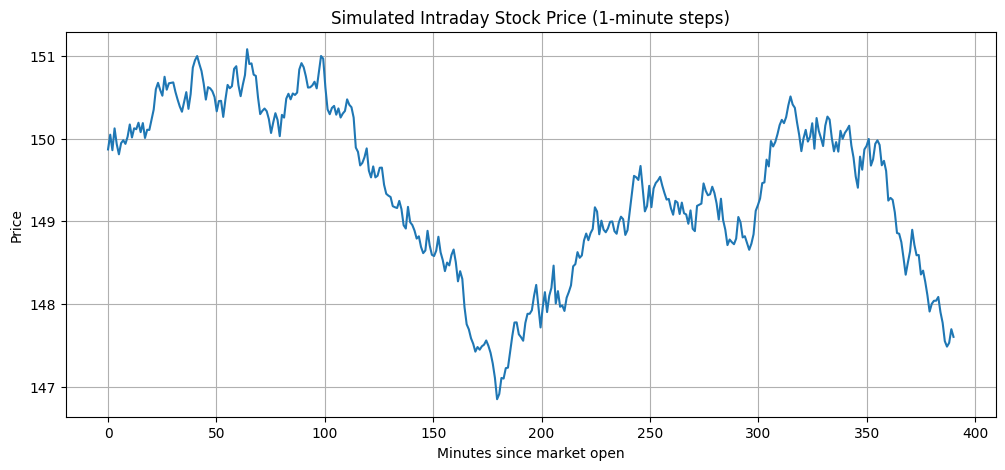

In [28]:
%reload_ext autoreload

import numpy as np

import matplotlib.pyplot as plt
import functions as fn

# Simulate
t, S = fn.simulate_intraday_gbm(S0=150, mu=0.001, sigma=0.02)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(t * 390, S)
plt.title("Simulated Intraday Stock Price (1-minute steps)")
plt.xlabel("Minutes since market open")
plt.ylabel("Price")
plt.grid(True)
plt.show()


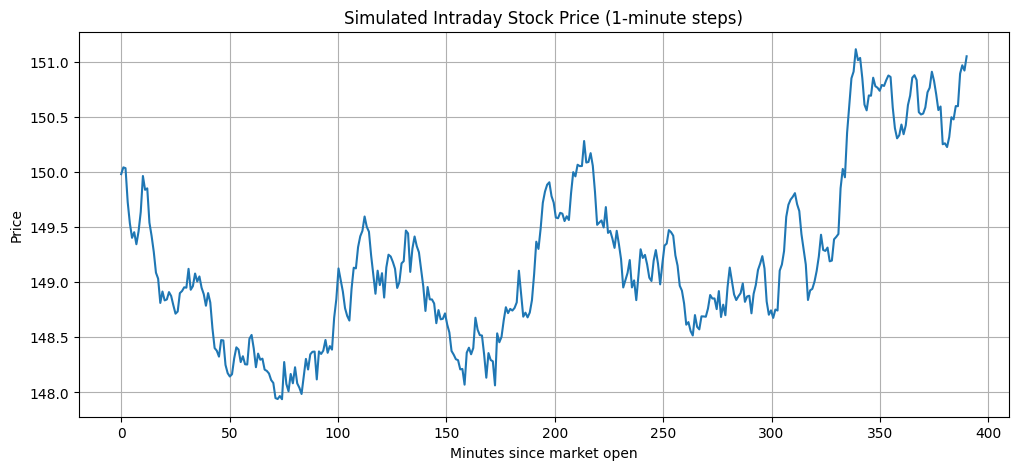

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import functions as fn
import importlib
importlib.reload(fn)  # 👈 force reload from updated source

# Simulate
t, S = fn.simulate_intraday_gbm(S0=150, mu=0.001, sigma=0.02)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(t * 390, S)
plt.title("Simulated Intraday Stock Price (1-minute steps)")
plt.xlabel("Minutes since market open")
plt.ylabel("Price")
plt.grid(True)
plt.show()


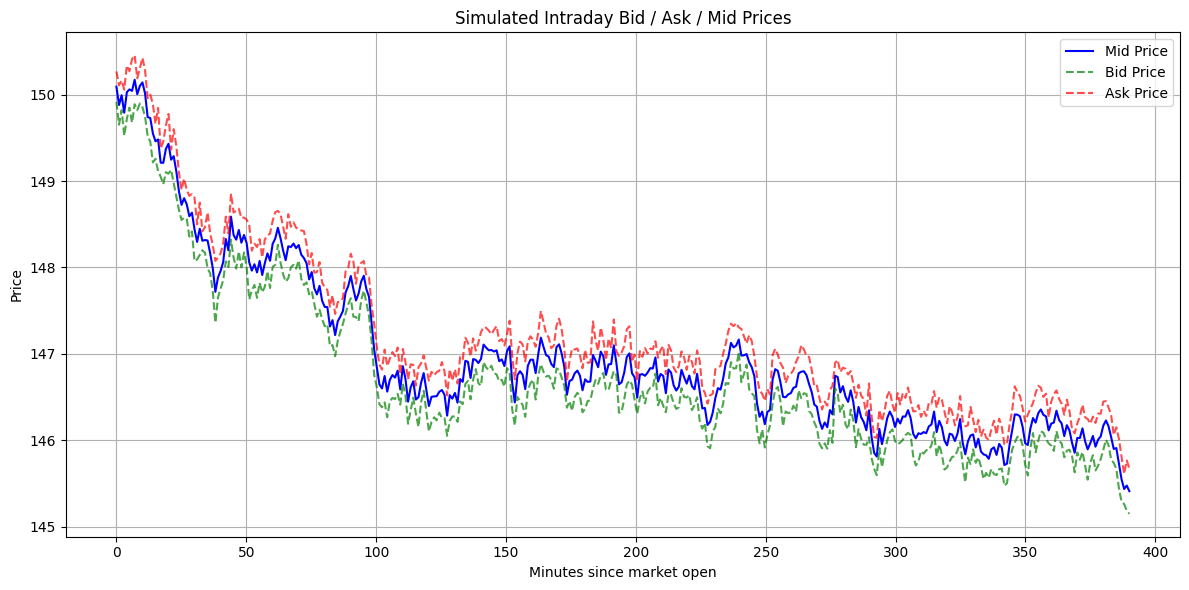

In [48]:
# bid /ask

import numpy as np
import matplotlib.pyplot as plt
import functions as fn
import importlib
importlib.reload(fn)  # 👈 force reload from updated source



# Simulate mid-price
t, mid_price = fn.simulate_intraday_gbm(S0=150, mu=0.001, sigma=0.02)

# Generate bid/ask
bid, ask = fn.simulate_bid_ask(mid_price, base_spread=0.05, random_spread=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(t * 390, mid_price, label='Mid Price', color='blue', linewidth=1.5)
plt.plot(t * 390, bid, label='Bid Price', color='green', linestyle='--', alpha=0.7)
plt.plot(t * 390, ask, label='Ask Price', color='red', linestyle='--', alpha=0.7)

plt.title("Simulated Intraday Bid / Ask / Mid Prices")
plt.xlabel("Minutes since market open")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
import functions
print(dir(functions))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'graph_array', 'np', 'plt']


In [55]:
import plotly.graph_objects as go
import functions as fn
import importlib
importlib.reload(fn)  # 👈 force reload from updated source


# Assume t, mid_price, bid, ask already defined

# Simulate mid-price
t, mid_price = fn.simulate_intraday_gbm(S0=150, mu=0.001, sigma=0.02)

# Generate bid/ask
bid, ask = fn.simulate_bid_ask(mid_price, base_spread=0.05, random_spread=True)

x = t * 390  # minutes

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=mid_price, mode='lines', name='Mid Price', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x, y=bid, mode='lines', name='Bid Price', line=dict(color='green', dash='dash')))
fig.add_trace(go.Scatter(x=x, y=ask, mode='lines', name='Ask Price', line=dict(color='red', dash='dash')))

fig.update_layout(
    title='Simulated Intraday Bid / Ask / Mid Prices',
    xaxis_title='Minutes since market open',
    yaxis_title='Price',
    hovermode='x unified',
    template='plotly_white',
    height=500,
    width=2000
)

fig.show()


In [53]:
import pandas as pd

# Assume you already have:
# t (normalized time from 0 to 1), bid, mid_price, ask

# Convert time to minutes since open
minutes = t * 390

# Create DataFrame
df = pd.DataFrame({
    'Minute': minutes,
    'Bid': bid,
    'Mid': mid_price,
    'Ask': ask
})

# Optional: round for readability
df = df.round({'Minute': 2, 'Bid': 4, 'Mid': 4, 'Ask': 4})

# Export to CSV
df.to_csv('intraday_bid_mid_ask.csv', index=False)

print("✅ Exported to intraday_bid_mid_ask.csv")


✅ Exported to intraday_bid_mid_ask.csv
